In [1]:
# Importing Libraries 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report

In [2]:
# Reading Data From CSV File 

matches = pd.read_csv('matches.csv')

In [3]:
# Data Analysis 

matches.head(20)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
7,8,2017,Indore,2017-04-10,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
8,9,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
9,10,2017,Mumbai,2017-04-12,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN


In [4]:
# Checking For Null Values 

null_columns = matches.isnull().sum()
print(null_columns[null_columns > 0])

city                 7
winner               4
player_of_match      4
umpire1              2
umpire2              2
umpire3            637
dtype: int64


In [5]:
# Checking Each Unique Venues 
matches['venue'].unique()

array(['Rajiv Gandhi International Stadium, Uppal',
       'Maharashtra Cricket Association Stadium',
       'Saurashtra Cricket Association Stadium', 'Holkar Cricket Stadium',
       'M Chinnaswamy Stadium', 'Wankhede Stadium', 'Eden Gardens',
       'Feroz Shah Kotla',
       'Punjab Cricket Association IS Bindra Stadium, Mohali',
       'Green Park', 'Punjab Cricket Association Stadium, Mohali',
       'Sawai Mansingh Stadium', 'MA Chidambaram Stadium, Chepauk',
       'Dr DY Patil Sports Academy', 'Newlands', "St George's Park",
       'Kingsmead', 'SuperSport Park', 'Buffalo Park',
       'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed V

In [6]:
conditions = [matches["venue"] == "Rajiv Gandhi International Stadium, Uppal",
              matches["venue"] == "Maharashtra Cricket Association Stadium",
              matches["venue"] == "Saurashtra Cricket Association Stadium", 
              matches["venue"] == "Holkar Cricket Stadium",
              matches["venue"] == "M Chinnaswamy Stadium",
              matches["venue"] == "Wankhede Stadium",
              matches["venue"] == "Eden Gardens",
              matches["venue"] == "Feroz Shah Kotla",
              matches["venue"] == "Punjab Cricket Association IS Bindra Stadium, Mohali",
              matches["venue"] == "Green Park",
              matches["venue"] == "Punjab Cricket Association Stadium, Mohali",
              matches["venue"] == "Dr DY Patil Sports Academy",
              matches["venue"] == "Sawai Mansingh Stadium", 
              matches["venue"] == "MA Chidambaram Stadium, Chepauk", 
              matches["venue"] == "Newlands", 
              matches["venue"] == "St George's Park" , 
              matches["venue"] == "Kingsmead", 
              matches["venue"] == "SuperSport Park",
              matches["venue"] == "Buffalo Park", 
              matches["venue"] == "New Wanderers Stadium",
              matches["venue"] == "De Beers Diamond Oval", 
              matches["venue"] == "OUTsurance Oval", 
              matches["venue"] == "Brabourne Stadium",
              matches["venue"] == "Sardar Patel Stadium", 
              matches["venue"] == "Barabati Stadium", 
              matches["venue"] == "Vidarbha Cricket Association Stadium, Jamtha",
              matches["venue"] == "Himachal Pradesh Cricket Association Stadium",
              matches["venue"] == "Nehru Stadium",
              matches["venue"] == "Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium",
              matches["venue"] == "Subrata Roy Sahara Stadium",
              matches["venue"] == "Shaheed Veer Narayan Singh International Stadium",
              matches["venue"] == "JSCA International Stadium Complex",
              matches["venue"] == "Sheikh Zayed Stadium",
              matches["venue"] == "Sharjah Cricket Stadium",
              matches["venue"] == "Dubai International Cricket Stadium",
              matches["venue"] == "M. A. Chidambaram Stadium",
              matches["venue"] == "Feroz Shah Kotla Ground",
              matches["venue"] == "M. Chinnaswamy Stadium",
              matches["venue"] == "Rajiv Gandhi Intl. Cricket Stadium" ,
              matches["venue"] == "IS Bindra Stadium",matches["venue"] == "ACA-VDCA Stadium"
             ]
values = ['Hyderabad', 'Mumbai', 'Rajkot',"Indore","Bengaluru","Mumbai","Kolkata","Delhi","Mohali","Kanpur","Mohali","Pune","Jaipur","Chennai","Cape Town","Port Elizabeth","Durban",
          "Centurion",'Eastern Cape','Johannesburg','Northern Cape','Bloemfontein','Mumbai','Ahmedabad','Cuttack','Jamtha','Dharamshala','Chennai','Visakhapatnam','Pune','Raipur','Ranchi',
          'Abu Dhabi','Sharjah','Dubai','Chennai','Delhi','Bengaluru','Hyderabad','Mohali','Visakhapatnam'
         ]
matches['city'] = np.where(matches['city'].isnull(),
                           np.select(conditions,values),
                           matches['city']
                          )
null_columns = matches.isnull().sum()
print(null_columns[null_columns > 0])

winner               4
player_of_match      4
umpire1              2
umpire2              2
umpire3            637
dtype: int64


In [7]:
matches = matches[matches['winner'].notna()]
matches

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


Text(0.5, 1.0, 'No of matches won by different teams')

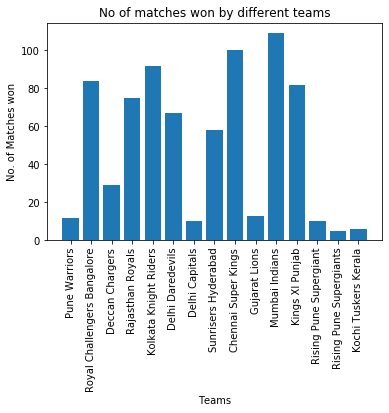

In [11]:
teams = list(set(matches.loc[:,'team1']))
matches_won = [len(matches.loc[matches['winner'] == i]) for i in teams]
plt.bar(np.arange(len(teams)), matches_won)
plt.xticks(np.arange(len(teams)), teams, rotation='vertical')
plt.ylabel('No. of Matches won')
plt.xlabel('Teams')
plt.title('No of matches won by different teams')

In [16]:
matches['team2'].replace("Rising Pune Supergiant","Rising Pune Supergiants" , inplace = True )
matches['team1'].replace("Rising Pune Supergiant","Rising Pune Supergiants", inplace = True)
matches['winner'].replace("Rising Pune Supergiant","Rising Pune Supergiants", inplace = True)
matches['toss_winner'].replace("Rising Pune Supergiant","Rising Pune Supergiants", inplace = True)


/home/linux/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [17]:
encoder = LabelEncoder()
matches['team1'] = encoder.fit_transform(matches['team1'])
matches['team2'] = encoder.fit_transform(matches['team2'])
matches['winner'] = encoder.fit_transform(matches['winner'])
matches['toss_winner'] = encoder.fit_transform(matches['toss_winner'])
matches['venue'] = encoder.fit_transform(matches['venue'])

In [20]:
#outcome variable as a probability of team1 winning
matches.loc[matches["winner"]==matches["team1"],"team1_win"]=1
matches.loc[matches["winner"]!=matches["team1"],"team1_win"]=0

In [21]:
matches.loc[matches["toss_winner"]==matches["team1"],"team1_toss_win"]=1
matches.loc[matches["toss_winner"]!=matches["team1"],"team1_toss_win"]=0

In [22]:
matches["team1_bat"]=0
matches.loc[(matches["team1_toss_win"]==1) & (matches["toss_decision"]=="bat"),"team1_bat"]=1

In [23]:
prediction_df=matches[["team1","team2","team1_toss_win","team1_bat","team1_win","venue"]]


In [24]:
correlated_features = set()
correlation_matrix = prediction_df.drop('team1_win', axis=1).corr()
correlation_matrix

,team1,team2,team1_toss_win,team1_bat,venue
team1,1.000000,-0.108116,-0.116832,-0.116832,0.108240
team2,-0.108116,1.000000,-0.008782,-0.008782,0.084187
team1_toss_win,-0.116832,-0.008782,1.000000,1.000000,0.050049
team1_bat,-0.116832,-0.008782,1.000000,1.000000,0.050049
venue,0.108240,0.084187,0.050049,0.050049,1.000000


In [25]:

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

prediction_df.drop(columns=correlated_features)


,team1,team2,team1_toss_win,team1_win,venue
0,13,12,0.0,1.0,28
1,8,11,0.0,0.0,21
2,4,7,0.0,0.0,31
3,11,5,0.0,0.0,13
4,12,3,1.0,1.0,17
...,...,...,...,...,...
751,7,8,0.0,0.0,40
752,0,8,1.0,0.0,18
753,13,2,0.0,0.0,0
754,2,0,0.0,0.0,0


In [26]:
X = prediction_df.drop('team1_win', axis=1)
target = prediction_df['team1_win']
target=target.astype(int)


In [27]:
logReg=LogisticRegression(solver='lbfgs')
rfe = RFE(logReg, 20)
rfe = rfe.fit(X, target.values.ravel())
#Checking for the features of they are important
print(rfe.support_)

[ True  True  True  True  True]


In [28]:
#Splitting the data into training and testing data and scaling it
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [29]:
#Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(logreg.score(X_test, y_test)))


[[93  2]
 [56  0]]
              precision    recall  f1-score   support

           0       0.62      0.98      0.76        95
           1       0.00      0.00      0.00        56

    accuracy                           0.62       151
   macro avg       0.31      0.49      0.38       151
weighted avg       0.39      0.62      0.48       151

Accuracy of logistic regression classifier on test set: 0.6159


In [30]:
#SVM
svm=SVC()
svm.fit(X_train,y_train)
svm.score(X_test,y_test)
y_pred = svm.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Accuracy of SVM classifier on test set: {:.4f}'.format(svm.score(X_test, y_test)))


[[93  2]
 [49  7]]
              precision    recall  f1-score   support

           0       0.65      0.98      0.78        95
           1       0.78      0.12      0.22        56

    accuracy                           0.66       151
   macro avg       0.72      0.55      0.50       151
weighted avg       0.70      0.66      0.57       151

Accuracy of SVM classifier on test set: 0.6623
